In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.dates as mdates
from sklearn.metrics import auc

#Set the font
from matplotlib import font_manager
font_dirs = ['/home/user/gzhao/Thesis/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
   font_manager.fontManager.addfont(font_file)
   
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

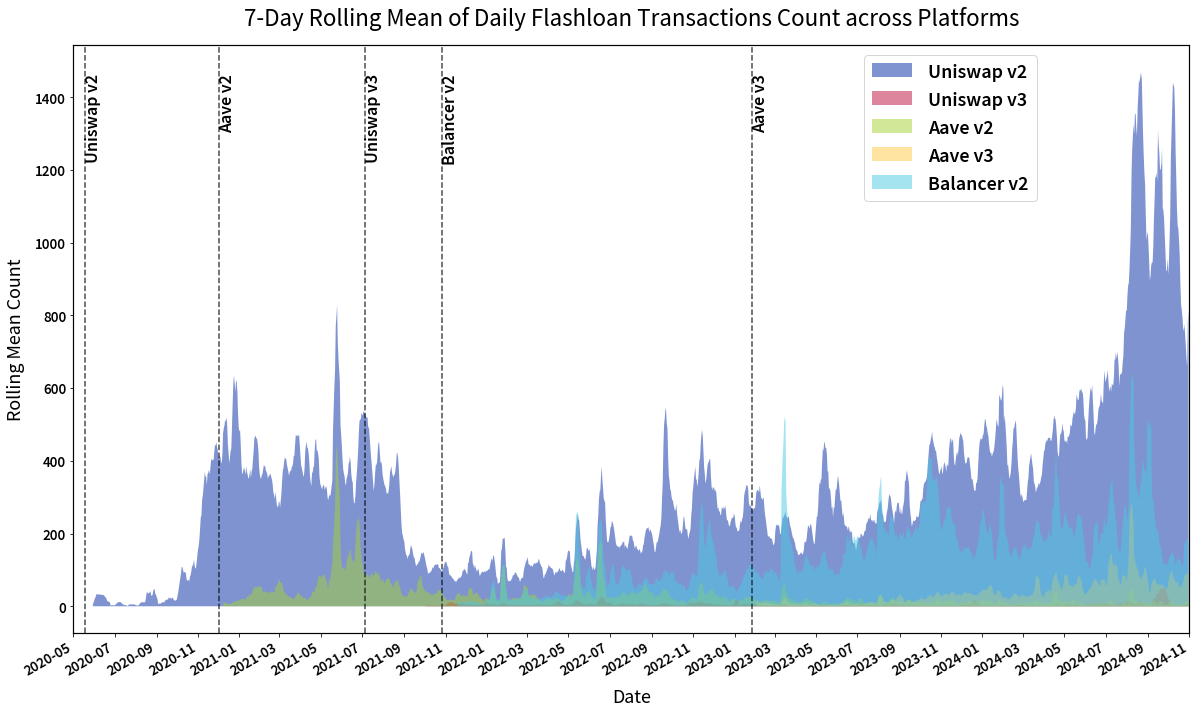

Uniswap v2:
  - Average daily flashloan count: 328.66
  - Highest daily flashloan count: 2217
Uniswap v3:
  - Average daily flashloan count: 5.94
  - Highest daily flashloan count: 84
Aave v2:
  - Average daily flashloan count: 32.21
  - Highest daily flashloan count: 954
Aave v3:
  - Average daily flashloan count: 40.79
  - Highest daily flashloan count: 738
Balancer v2:
  - Average daily flashloan count: 149.69
  - Highest daily flashloan count: 1650


In [7]:
Uniswap_v2_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_flashloan_count.csv')
Uniswap_v3_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v3_flashloan_count.csv')
Aave_v2_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_flashloan_count.csv')
Aave_v3_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v3_flashloan_count.csv')
Balancer_v2_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_flashloan_count.csv')

for df in [Uniswap_v2_flashloan_count_df, Uniswap_v3_flashloan_count_df,
           Aave_v2_flashloan_count_df, Aave_v3_flashloan_count_df,
           Balancer_v2_flashloan_count_df]:
    df['date'] = pd.to_datetime(df['date'])

fig, ax = plt.subplots(figsize=(20, 12)) 

# Calculate rolling mean
rolling_window = 7
for platform_df, label in zip(
        [Uniswap_v2_flashloan_count_df, Uniswap_v3_flashloan_count_df, 
         Aave_v2_flashloan_count_df, Aave_v3_flashloan_count_df, 
         Balancer_v2_flashloan_count_df],
        ['Uniswap v2', 'Uniswap v3', 'Aave v2', 'Aave v3', 'Balancer v2']):
    
    # Calculate rolling mean
    platform_df['rolling_mean'] = platform_df['daily_flash_tx_count'].rolling(window=rolling_window).mean()

    # Create area plot for rolling mean
    ax.fill_between(platform_df['date'], platform_df['rolling_mean'], label=label, alpha=0.5)
    
    # Mark the first transaction date with a vertical dashed line and add text
    first_transaction_date = platform_df['date'].iloc[0]
    ax.axvline(first_transaction_date, color='black', linestyle='--', alpha=0.7)
    ax.text(first_transaction_date, ax.get_ylim()[1] * 0.95, label, 
            rotation=90, verticalalignment='top', fontsize=18, color='black')

ax.set_title('7-Day Rolling Mean of Daily Flashloan Transactions Count across Platforms',
             fontsize=25, pad=20)
ax.set_xlabel('Date', fontsize=20, labelpad=10)
ax.set_ylabel('Rolling Mean Count', fontsize=20, labelpad=10)
ax.tick_params(axis='x', rotation=45, labelsize=15)
ax.tick_params(axis='y', labelsize=15)

start_date = pd.to_datetime("2020-05-01")
end_date = pd.to_datetime("2024-11-01")
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
fig.autofmt_xdate()

ax.legend(loc='upper left', bbox_to_anchor=(0.7, 1), fontsize=20, ncol=1, frameon=True)

fig.savefig('/home/user/gzhao/Thesis/result/daily_flashloan_rolling_mean_area_plot.pdf', facecolor='white', transparent=False)
plt.show()

# Calculate average daily flashloan and highest flashloan count for each platform
platforms = {
    "Uniswap v2": Uniswap_v2_flashloan_count_df,
    "Uniswap v3": Uniswap_v3_flashloan_count_df,
    "Aave v2": Aave_v2_flashloan_count_df,
    "Aave v3": Aave_v3_flashloan_count_df,
    "Balancer v2": Balancer_v2_flashloan_count_df
}

for platform, df in platforms.items():
    avg_flashloan = df['daily_flash_tx_count'].mean()
    max_flashloan = df['daily_flash_tx_count'].max()
    print(f"{platform}:")
    print(f"  - Average daily flashloan count: {avg_flashloan:.2f}")
    print(f"  - Highest daily flashloan count: {max_flashloan}")


/tmp/ipykernel_1458876/323486806.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  len(pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_flashloan_unique.csv'))


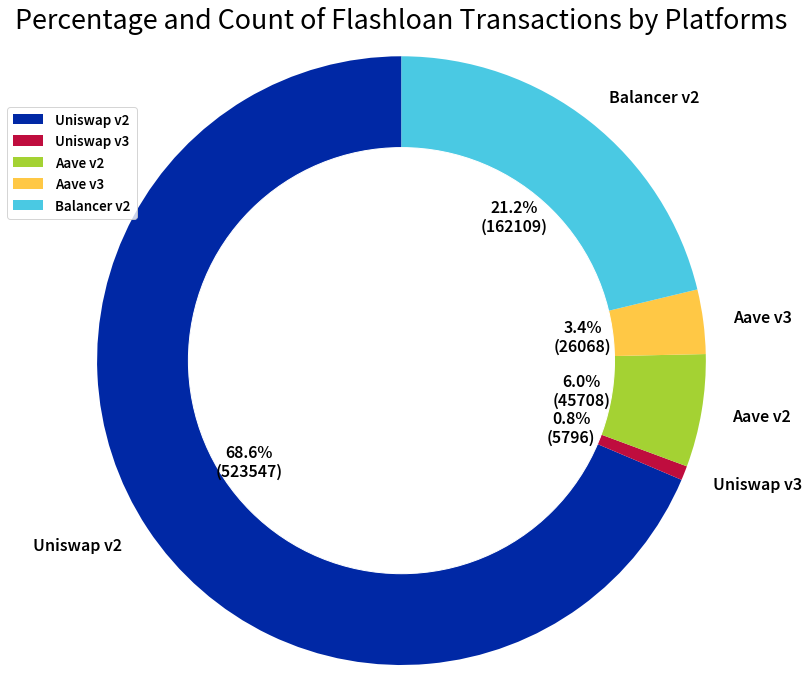

In [8]:
counts = [
    len(pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_flashloan_unique.csv')),
    len(pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v3_flashloan_unique.csv')),
    len(pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_flashloan_unique.csv')),
    len(pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v3_flashloan_unique.csv')),
    len(pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_flashloan_unique.csv'))
]
labels = ['Uniswap v2', 'Uniswap v3', 'Aave v2', 'Aave v3', 'Balancer v2']

# Function to display both the count and percentage
def autopct_format(pct, all_values):
    total = sum(all_values)
    absolute = int(pct / 100. * total)
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(12, 12))

ax.pie(
    counts, 
    labels=labels, 
    autopct=lambda pct: autopct_format(pct, counts), 
    startangle=90, 
    wedgeprops={'width': 0.4},
    textprops={'fontsize': 18} 
)

center_circle = plt.Circle((0, 0), 0.70, color='white')
ax.add_artist(center_circle)

ax.axis('equal')


ax.legend(
    loc='upper left',  
    fontsize=15,       
    bbox_to_anchor=(-0.1, 0.9) 
)


ax.set_title('Percentage and Count of Flashloan Transactions by Platforms', fontsize=30)
fig.savefig('/home/user/gzhao/Thesis/result/Donut_chart_Transaction_Count_and_Percentage.pdf', facecolor='white', transparent=False)
plt.show()

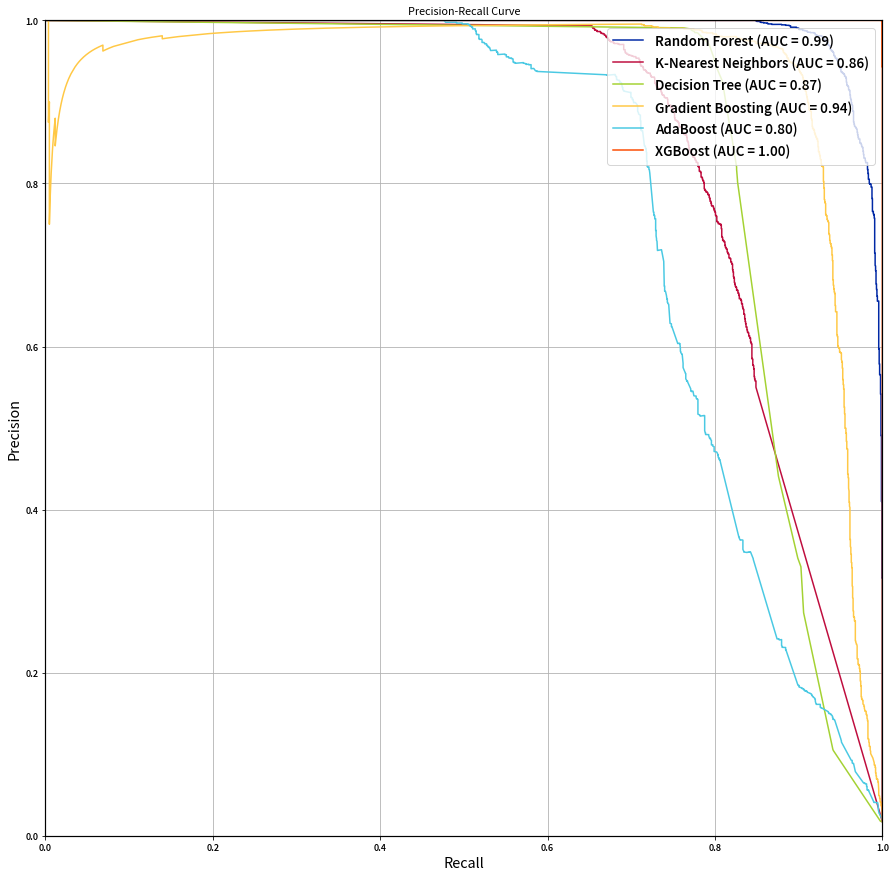

In [9]:
rf_pr_df = pd.read_csv('Models/random_forest_precision_recall_data.csv')
knn_pr_df = pd.read_csv('Models/knn_precision_recall_data.csv')
dt_pr_df = pd.read_csv('Models/decision_tree_precision_recall_data.csv')
gb_pr_df = pd.read_csv('Models/gradient_boosting_precision_recall_data.csv')
ada_pr_df = pd.read_csv('Models/adaboost_precision_recall_data.csv')
xg_pr_df = pd.read_csv('Models/xgboost_precision_recall_data.csv')

# Calculate AUC for Precision-Recall curves
rf_pr_auc = auc(rf_pr_df['Recall'], rf_pr_df['Precision'])
knn_pr_auc = auc(knn_pr_df['Recall'], knn_pr_df['Precision'])
dt_pr_auc = auc(dt_pr_df['Recall'], dt_pr_df['Precision'])
gb_pr_auc = auc(gb_pr_df['Recall'], gb_pr_df['Precision'])
ada_pr_auc = auc(ada_pr_df['Recall'], ada_pr_df['Precision'])
xg_pr_auc = auc(xg_pr_df['Recall'], xg_pr_df['Precision'])

fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(rf_pr_df['Recall'], rf_pr_df['Precision'], label=f'Random Forest (AUC = {rf_pr_auc:.2f})')
ax.plot(knn_pr_df['Recall'], knn_pr_df['Precision'], label=f'K-Nearest Neighbors (AUC = {knn_pr_auc:.2f})')
ax.plot(dt_pr_df['Recall'], dt_pr_df['Precision'], label=f'Decision Tree (AUC = {dt_pr_auc:.2f})')
ax.plot(gb_pr_df['Recall'], gb_pr_df['Precision'], label=f'Gradient Boosting (AUC = {gb_pr_auc:.2f})')
ax.plot(ada_pr_df['Recall'], ada_pr_df['Precision'], label=f'AdaBoost (AUC = {ada_pr_auc:.2f})')
ax.plot(xg_pr_df['Recall'], xg_pr_df['Precision'], label=f'XGBoost (AUC = {xg_pr_auc:.2f})')


ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='upper right', fontsize=15)
ax.grid()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

fig.savefig('/home/user/gzhao/Thesis/result/precision_recall_curve.pdf', facecolor='white', transparent=False)
plt.show()


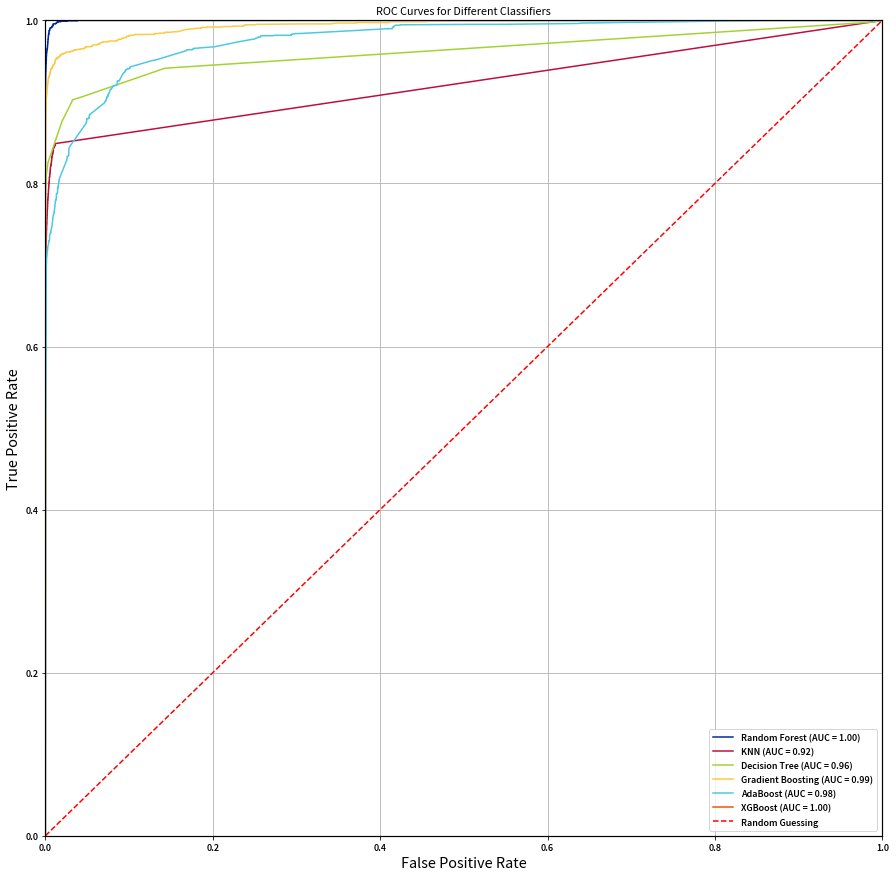

In [10]:
rf_roc_df = pd.read_csv('Models/random_forest_roc_data.csv')
knn_roc_df = pd.read_csv('Models/knn_roc_data.csv')
dt_roc_df = pd.read_csv('Models/decision_tree_roc_data.csv')
gb_roc_df = pd.read_csv('Models/gradient_boosting_roc_data.csv')
ada_roc_df = pd.read_csv('Models/adaboost_roc_data.csv')
xg_roc_df = pd.read_csv('Models/xgboost_roc_data.csv')

rf_metrics_df = pd.read_csv('Models/random_forest_metrics.csv')
knn_metrics_df = pd.read_csv('Models/knn_metrics.csv')
dt_metrics_df = pd.read_csv('Models/decision_tree_metrics.csv')
gb_metrics_df = pd.read_csv('Models/gradient_boosting_metrics.csv')
ada_metrics_df = pd.read_csv('Models/adaboost_metrics.csv')
xg_metrics_df = pd.read_csv('Models/xgboost_metrics.csv')

rf_auc_value = rf_metrics_df.loc[rf_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
knn_auc_value = knn_metrics_df.loc[knn_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
dt_auc_value = dt_metrics_df.loc[dt_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
gb_auc_value = gb_metrics_df.loc[gb_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
ada_auc_value = ada_metrics_df.loc[ada_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
xg_auc_value = xg_metrics_df.loc[xg_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]

fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(rf_roc_df['False Positive Rate'], rf_roc_df['True Positive Rate'], label=f'Random Forest (AUC = {rf_auc_value:.2f})')
ax.plot(knn_roc_df['False Positive Rate'], knn_roc_df['True Positive Rate'], label=f'KNN (AUC = {knn_auc_value:.2f})')
ax.plot(dt_roc_df['False Positive Rate'], dt_roc_df['True Positive Rate'], label=f'Decision Tree (AUC = {dt_auc_value:.2f})')
ax.plot(gb_roc_df['False Positive Rate'], gb_roc_df['True Positive Rate'], label=f'Gradient Boosting (AUC = {gb_auc_value:.2f})')
ax.plot(ada_roc_df['False Positive Rate'], ada_roc_df['True Positive Rate'], label=f'AdaBoost (AUC = {ada_auc_value:.2f})')
ax.plot(xg_roc_df['False Positive Rate'], xg_roc_df['True Positive Rate'], label=f'XGBoost (AUC = {xg_auc_value:.2f})')

ax.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')


ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves for Different Classifiers')
ax.legend()
ax.grid()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

fig.savefig('/home/user/gzhao/Thesis/result/ROC_Curves.pdf', facecolor='white', transparent=False)
plt.show()

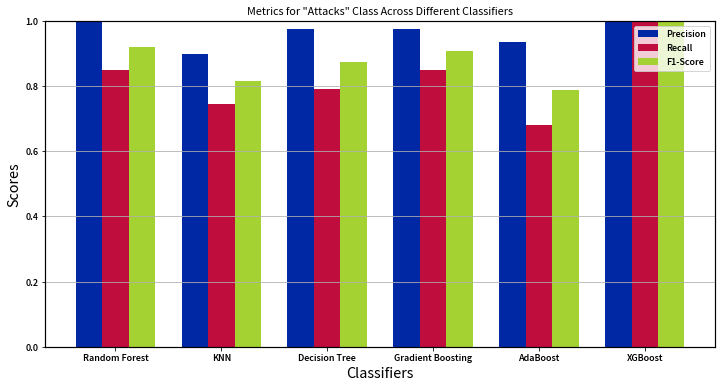

In [11]:
metrics = {
    'Classifier': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

def extract_metrics(metrics_df, classifier_name):
    precision = metrics_df.loc[metrics_df['Metric'] == f'Precision (1)', 'Value'].values[0]
    recall = metrics_df.loc[metrics_df['Metric'] == f'Recall (1)', 'Value'].values[0]
    f1_score = metrics_df.loc[metrics_df['Metric'] == f'F1-Score (1)', 'Value'].values[0]
    
    metrics['Classifier'].append(classifier_name)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1_score)

extract_metrics(rf_metrics_df, 'Random Forest')
extract_metrics(knn_metrics_df, 'KNN')
extract_metrics(dt_metrics_df, 'Decision Tree')
extract_metrics(gb_metrics_df, 'Gradient Boosting')
extract_metrics(ada_metrics_df, 'AdaBoost')
extract_metrics(xg_metrics_df, 'XGBoost')


metrics_df = pd.DataFrame(metrics)

bar_width = 0.25
positions = range(len(metrics_df))


fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(positions, metrics_df['Precision'], width=bar_width, label='Precision')
ax.bar([p + bar_width for p in positions], metrics_df['Recall'], width=bar_width, label='Recall')
ax.bar([p + bar_width * 2 for p in positions], metrics_df['F1-Score'], width=bar_width, label='F1-Score')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Metrics for "Attacks" Class Across Different Classifiers')
ax.set_xticks([p + bar_width for p in positions])  
ax.set_xticklabels(metrics_df['Classifier'])
ax.legend()
ax.grid(axis='y')
ax.set_ylim(0, 1) 

fig.savefig('/home/user/gzhao/Thesis/result/Metrics.pdf', facecolor='white', transparent=False)
plt.show()

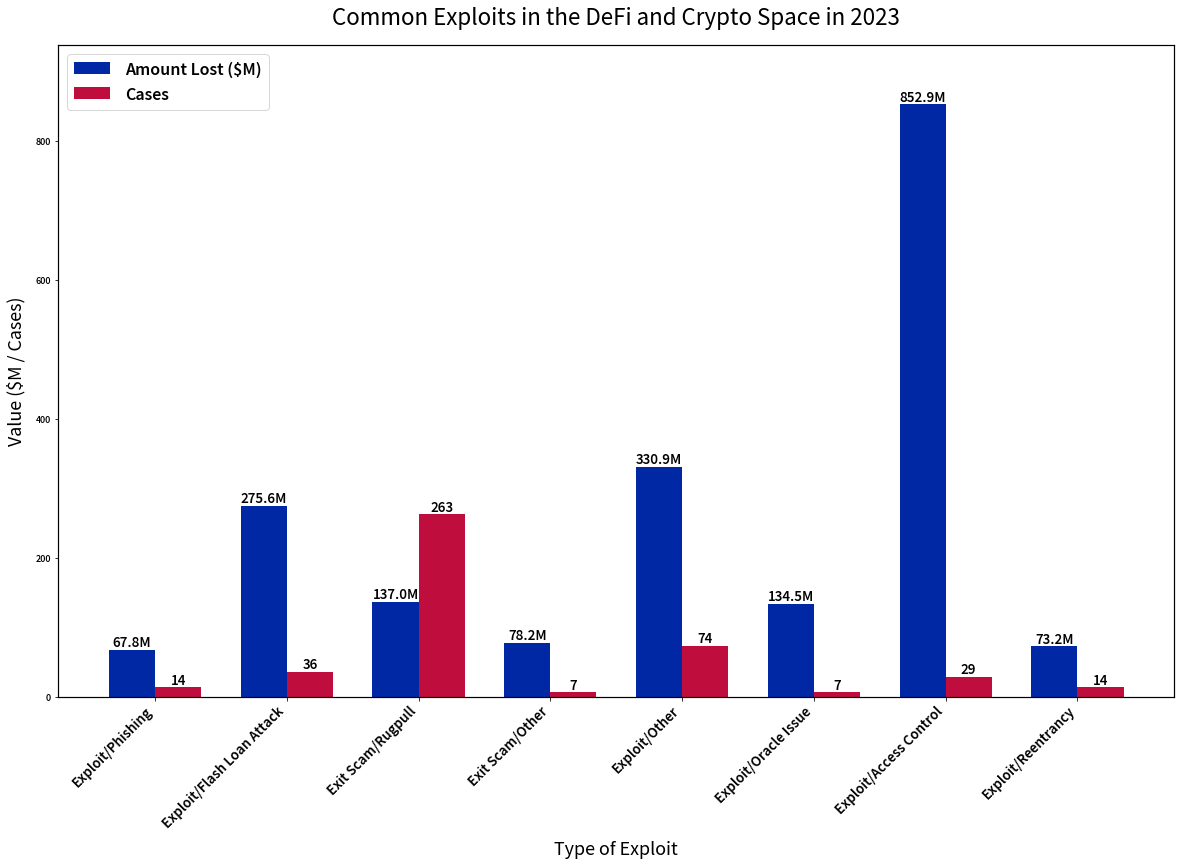

In [12]:
data = {
    "Type of Exploit": [
        "Exploit/Phishing",
        "Exploit/Flash Loan Attack",
        "Exit Scam/Rugpull",
        "Exit Scam/Other",
        "Exploit/Other",
        "Exploit/Oracle Issue",
        "Exploit/Access Control",
        "Exploit/Reentrancy",
    ],
    "Cases": [14, 36, 263, 7, 74, 7, 29, 14],
    "Amount Lost ($M)": [
        67.824655,
        275.594997,
        136.991987,
        78.232623,
        330.922107,
        134.479921,
        852.896976,
        73.158394,
    ],
}

df = pd.DataFrame(data)

bar_width = 0.35
index = np.arange(len(df))

fig, ax = plt.subplots(figsize=(20, 12))

bars_amount = ax.bar(index, df['Amount Lost ($M)'], bar_width, label='Amount Lost ($M)')
bars_cases = ax.bar(index + bar_width, df['Cases'], bar_width, label='Cases')

ax.set_title("Common Exploits in the DeFi and Crypto Space in 2023", fontsize=25, pad=20)
ax.set_xlabel("Type of Exploit", fontsize=20, labelpad=10)
ax.set_ylabel("Value ($M / Cases)", fontsize=20, labelpad=10)

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['Type of Exploit'], rotation=45, ha="right", fontsize=15)

ax.set_ylim(0, max(df['Amount Lost ($M)'].max(), df['Cases'].max()) * 1.1)

for bars in [bars_amount, bars_cases]:
    for bar in bars:
        height = bar.get_height()
        if bars is bars_amount:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}M', ha='center', va='bottom', fontsize=15, color='black')
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=15, color='black')

ax.legend(loc='upper left', fontsize=18, ncol=1)

fig.savefig('/home/user/gzhao/Thesis/result/exploits_and_loss_2023.pdf', facecolor='white', transparent=False)
plt.show()

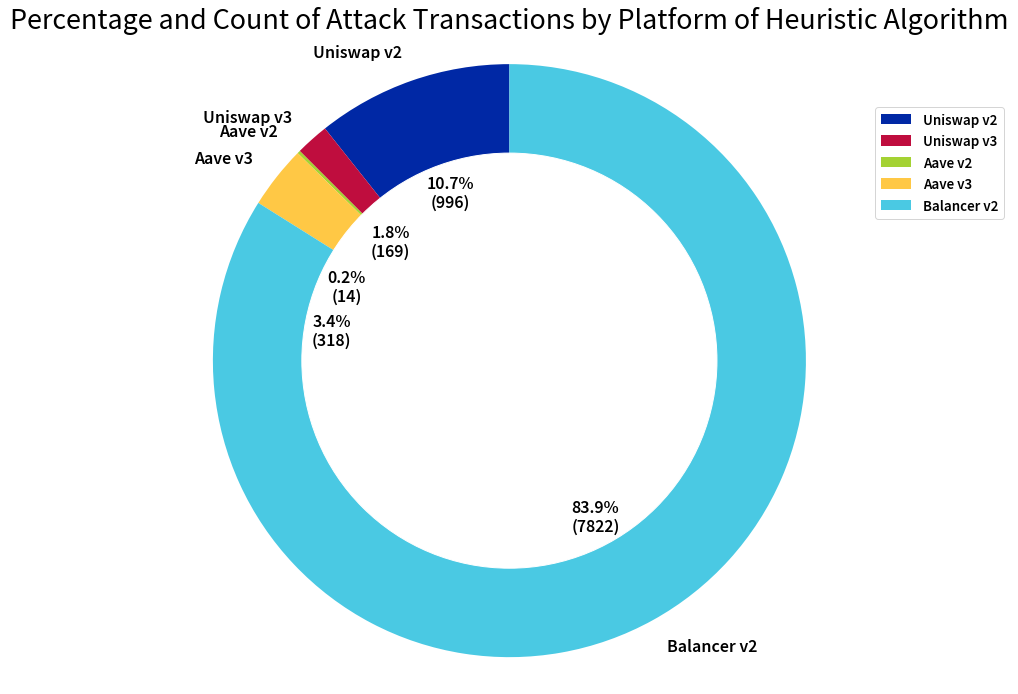

In [13]:
attack_label = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/attack_label.csv')

Uniswap_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_ABC.csv')
Uniswap_v3_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v3_ABC.csv')
Aave_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_ABC.csv')
Aave_v3_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v3_ABC.csv')
Balancer_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_ABC.csv')

Uniswap_v2_df['platform'] = 'Uniswap v2'
Uniswap_v3_df['platform'] = 'Uniswap v3'
Aave_v2_df['platform'] = 'Aave v2'
Aave_v3_df['platform'] = 'Aave v3'
Balancer_v2_df['platform'] = 'Balancer v2'

merged_df = pd.concat([Uniswap_v2_df, Uniswap_v3_df, Aave_v2_df, Aave_v3_df, Balancer_v2_df], ignore_index=True)

attack_label = merged_df[merged_df['tx_hash'].isin(attack_label['tx_hash'])]

platform_counts = attack_label['platform'].value_counts()
platform_counts = platform_counts.reindex(['Uniswap v2', 'Uniswap v3', 'Aave v2', 'Aave v3', 'Balancer v2'])


def autopct_format(pct, all_values):
    total = sum(all_values)
    absolute = int(pct / 100. * total)
    return "{:.1f}%\n({:d})".format(pct, absolute)


fig, ax = plt.subplots(figsize=(18, 12))

wedges, texts, autotexts = ax.pie(
    platform_counts,
    labels=platform_counts.index,
    autopct=lambda pct: autopct_format(pct, platform_counts),
    startangle=90,
    wedgeprops={'width': 0.4},
    textprops={'fontsize': 18},  
)


center_circle = plt.Circle((0, 0), 0.70, color='white')
ax.add_artist(center_circle)

for i, text in enumerate(autotexts):
    if platform_counts.index[i] == 'Aave v2':  
        text.set_position((-0.55, 0.25)) 
    if platform_counts.index[i] == 'Aave v3':  
        text.set_position((-0.6, 0.1))  
    if platform_counts.index[i] == 'Uniswap v3':  
        text.set_position((-0.4, 0.4)) 


ax.axis('equal')

ax.legend(
    loc='upper right',  
    fontsize=15,       
    bbox_to_anchor=(1, 0.9)  
)

ax.set_title('Percentage and Count of Attack Transactions by Platform of Heuristic Algorithm', fontsize=30)
fig.savefig('/home/user/gzhao/Thesis/result/Donut_chart_Attack_Transaction_Distribution_Heuristic_Algorithm.pdf', facecolor='white', transparent=False)
plt.show()

In [14]:
features = ['from_address_profit', 'to_address_profit', 'highest_profit_in_usd',
            'highest_price_change_ratio', 'path_length', 'num_swap_events', 'flashloan_in_usd']

attack_label['flashloan_in_usd'] = pd.to_numeric(attack_label['flashloan_in_usd'], errors='coerce')

stats = attack_label[features].agg(['mean', 'median', 'std']).T

print(stats)

                                    mean         median           std
from_address_profit         2.699514e+04     -20.336392  1.150429e+06
to_address_profit          -1.901296e+04       0.000000  5.050110e+05
highest_profit_in_usd       5.314971e+05  110842.153920  1.789956e+06
highest_price_change_ratio  3.264397e+45       0.000333  1.907826e+47
path_length                 2.857082e+01      21.000000  7.735286e+01
num_swap_events             1.469635e+00       1.000000  6.828903e+00
flashloan_in_usd            1.270162e+06  272035.984879  9.535330e+06


/tmp/ipykernel_1458876/3417098349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_label['flashloan_in_usd'] = pd.to_numeric(attack_label['flashloan_in_usd'], errors='coerce')


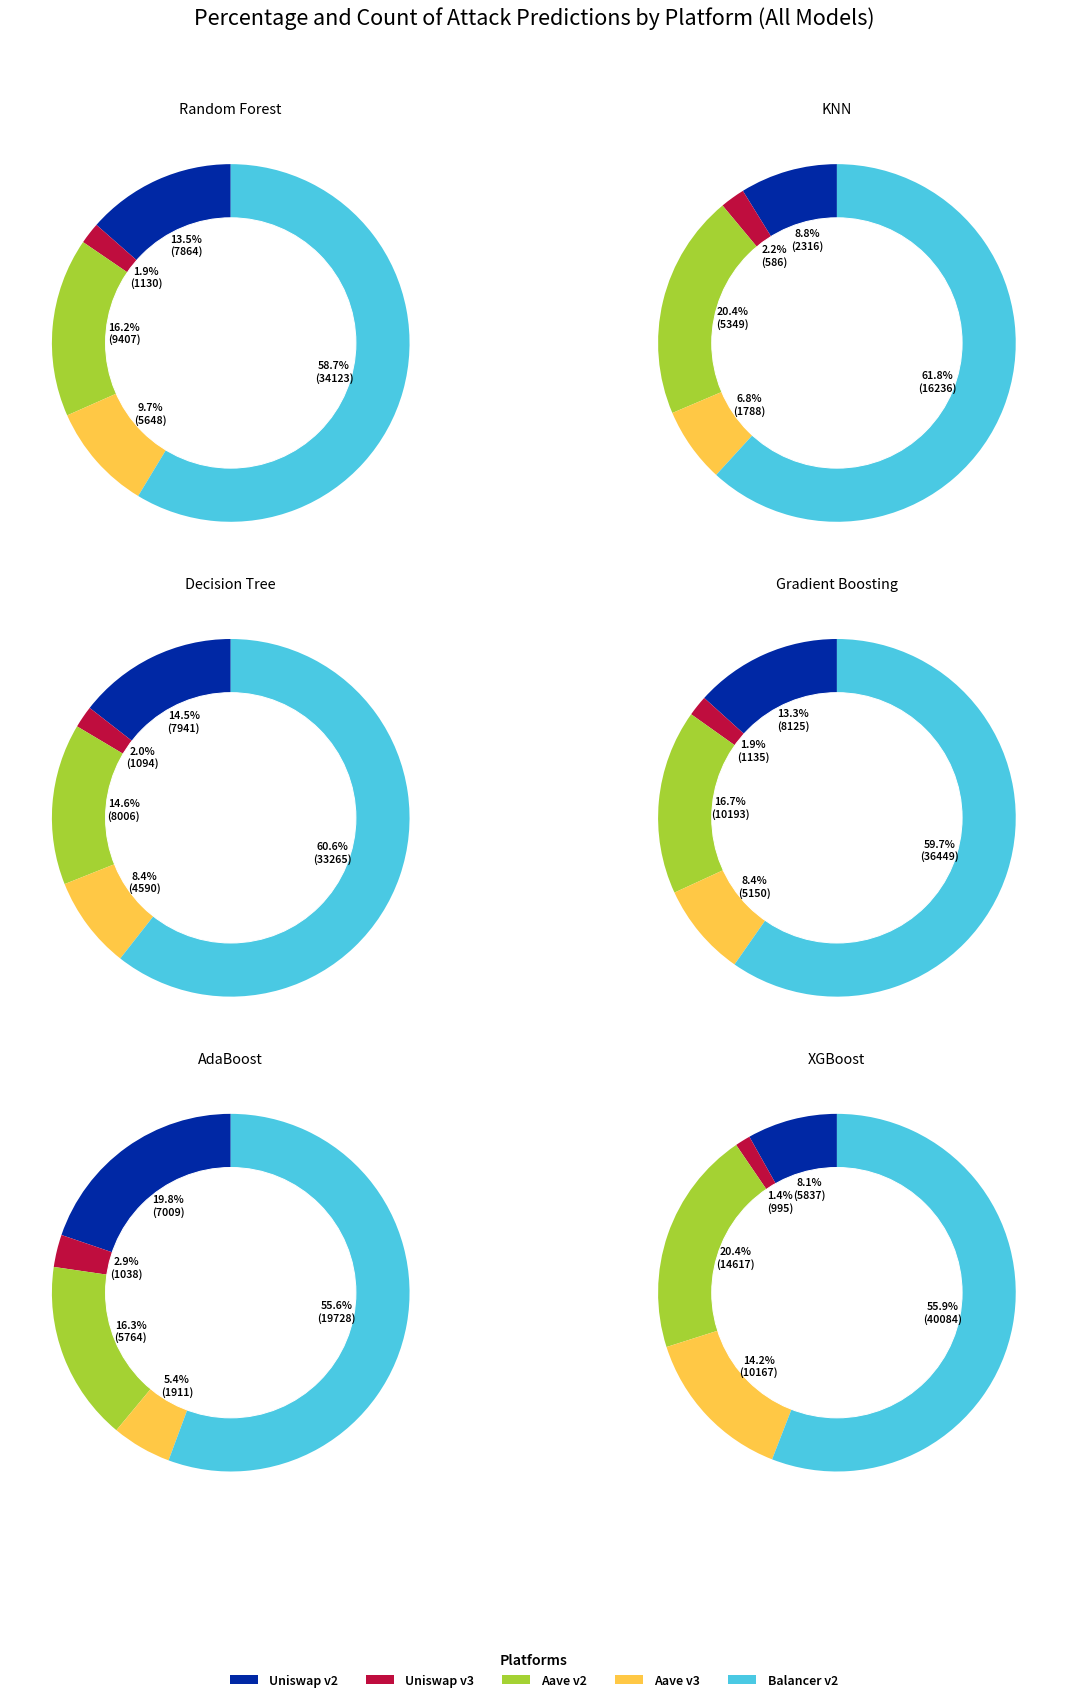

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

model_files = {
    'Random Forest': 'Models/random_forest_unlabeled_platform_prediction_counts.csv',
    'KNN': 'Models/knn_unlabeled_platform_prediction_counts.csv',
    'Decision Tree': 'Models/decision_tree_unlabeled_platform_prediction_counts.csv',
    'Gradient Boosting': 'Models/gradient_boosting_unlabeled_platform_prediction_counts.csv',
    'AdaBoost': 'Models/adaboost_unlabeled_platform_prediction_counts.csv',
    'XGBoost': 'Models/xgboost_unlabeled_platform_prediction_counts.csv'
}

def autopct_format(pct, all_values):
    total = sum(all_values)
    absolute = int(pct / 100.0 * total)
    return "{:.1f}%\n({:d})".format(pct, absolute)


fig, axes = plt.subplots(3, 2, figsize=(18, 24))
axes = axes.flatten()  

legend_labels = None
legend_handles = None


for idx, (model_name, file_path) in enumerate(model_files.items()):
    counts = pd.read_csv(file_path, index_col=0)['1'] 
    counts = counts.reindex(['Uniswap v2', 'Uniswap v3', 'Aave v2', 'Aave v3', 'Balancer v2'])

    wedges, texts, autotexts = axes[idx].pie(
        counts,
        labels=None, 
        autopct=lambda pct: autopct_format(pct, counts),
        startangle=90,
        wedgeprops={'width': 0.4},
        textprops={'fontsize': 12}
    )

    if legend_labels is None or legend_handles is None:
        legend_handles, legend_labels = wedges, counts.index

    center_circle = plt.Circle((0, 0), 0.70, color='white')
    axes[idx].add_artist(center_circle)

    axes[idx].set_title(model_name, fontsize=16)

for ax in axes[len(model_files):]:
    ax.axis('off')

fig.suptitle('Percentage and Count of Attack Predictions by Platform (All Models)', fontsize=24)

fig.legend(
    legend_handles,
    legend_labels,
    loc='lower center', 
    fontsize=14,
    title='Platforms',
    title_fontsize=16,
    ncol=5,  
    frameon=False,  
)

plt.tight_layout(rect=[0, 0.1, 1, 0.95]) 
plt.savefig('/home/user/gzhao/Thesis/result/Donut_chart_All_Models_Attack_Transaction_Distribution.pdf', facecolor='white', transparent=False)
plt.show()


In [16]:
Uniswap_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_ABC.csv')
Uniswap_v3_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v3_ABC.csv')
Aave_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_ABC.csv')
Aave_v3_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v3_ABC.csv')
Balancer_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_ABC.csv')

merged_flashloan_df = pd.concat([Uniswap_v2_df, Uniswap_v3_df, Aave_v2_df, Aave_v3_df, Balancer_v2_df], ignore_index=True)

temp = [
    "0x3b19e152943f31fe0830b67315ddc89be9a066dc89174256e17bc8c2d35b5af8",
    "0xcb0ad9da33ecabf75df0a24aabf8a4517e4a7c5b1b2f11fee3b6a1ad9299a282",
    "0xcb58fb952914896b35d909136b9f719b71fc8bc60b59853459fc2476d4369c3a",
    "0xf72f1d10fc6923f87279ce6c0aef46e372c6652a696f280b0465a301a92f2e26",
    "0x118b7b7c11f9e9bd630ea84ef267b183b34021b667f4a3061f048207d266437a",
    "0x3503253131644dd9f52802d071de74e456570374d586ddd640159cf6fb9b8ad8",
    "0x35f8d2f572fceaac9288e5d462117850ef2694786992a8c3f6d02612277b0877",
    "0x0fc6d2ca064fc841bc9b1c1fad1fbb97bcea5c9a1b2b66ef837f1227e06519a6",
    "0x958236266991bc3fe3b77feaacea120f172c0708ad01c7a715b255f218f9313c",
    "0x46a03488247425f845e444b9c10b52ba3c14927c687d38287c0faddc7471150a",
    "0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff239c9517d0cae33b595090",
    "0xf6022012b73770e7e2177129e648980a82aab555f9ac88b8a9cda3ec44b30779",
    "0xcd314668aaa9bbfebaf1a0bd2b6553d01dd58899c508d4729fa7311dc5d33ad7",
]

filtered_df = merged_flashloan_df[merged_flashloan_df['tx_hash'].isin(temp)]
filtered_df

,tx_hash,date,block_number,transactionIndex,logIndex,from_address,to_address,account_balance_change,ABC_in_usd,price_list,...,highest_profit_address,highest_profit_in_usd,reserve_before_swap_list,reserve_after_swap_list,price_change_ratio_list,highest_price_change_ratio,path_length,num_swap_events,flashloan_in_usd,Unnamed: 0
32350,0x0fc6d2ca064fc841bc9b1c1fad1fbb97bcea5c9a1b2b...,2020-10-26,11129500,0,75,0xf224ab004461540778a914ea397c589b677e27bb,0xc6028a9fa486f52efd2b95b949ac630d287ce0af,address ...,address ...,[{'token_address': '0xdac17f958d2ee523a2206206...,...,0x83f798e925bcd4017eb265844fddabb448f1707d,6.507729e+06,[{'reserve0': Decimal('62466636262048990350977...,[{'reserve0': Decimal('62466636262048990350977...,[Decimal('-0.000648641211459209283610098978103...,6.486412e-04,76,1,0.000000e+00,NaN
35970,0x118b7b7c11f9e9bd630ea84ef267b183b34021b667f4...,2023-05-09,17223596,30,137,0x662d2dc484d65a3ba4da80e36eaa9a400af0726b,0xecdb4d75af7e89a101703e0af465a191a2ae01b9,address ...,address ...,[{'token_address': '0xb1f4b66104353ec63d8d59d3...,...,0x4b905b7dc722fb3780945e1568d3caaca2567f1b,9.037353e+05,[{'reserve0': Decimal('999851232331834046796')...,[{'reserve0': Decimal('999999851780593628097')...,[Decimal('0.0000739298838951207184222665011175...,3.987264e+04,500,83,2.506264e+03,NaN
108035,0x3503253131644dd9f52802d071de74e456570374d586...,2020-09-29,10954411,3,77,0x223034edbe95823c1160c16f26e3000315171ca9,0x3882a1e71636c4d5896af656793cb358e6e9713f,address ...,address ...,[{'token_address': '0x6b175474e89094c44da98b95...,...,0x223034edbe95823c1160c16f26e3000315171ca9,5.975760e+06,[{'reserve0': Decimal('18353632999437083725669...,[{'reserve0': Decimal('18358158499437083725669...,[Decimal('0.0002465724361023672881049372646021...,2.465724e-04,54,1,1.514263e+07,NaN
110082,0x35f8d2f572fceaac9288e5d462117850ef2694786992...,2020-10-26,11129474,0,76,0xf224ab004461540778a914ea397c589b677e27bb,0xc6028a9fa486f52efd2b95b949ac630d287ce0af,address...,address ...,[{'token_address': '0xdac17f958d2ee523a2206206...,...,0xd6ad7a6750a7593e092a9b218d66c0a814a3436e,1.420117e+07,"[{'reserve0': Decimal('333795403578580'), 'res...","[{'reserve0': Decimal('333960900068048'), 'res...",[Decimal('0.0004958021820963746869895614877643...,4.958022e-04,86,3,4.983714e+07,NaN
144394,0x46a03488247425f845e444b9c10b52ba3c14927c687d...,2020-11-14,11256673,59,88,0xa773603b139ae1c52d05b35796df3ee76d8a9a2f,0x675bd0a0b03096c5ead734cfa00c7620538c7c6f,address...,address...,[{'token_address': '0x6b175474e89094c44da98b95...,...,0xa773603b139ae1c52d05b35796df3ee76d8a9a2f,5.428457e+06,[{'reserve0': Decimal('57104943232581030780705...,[{'reserve0': Decimal('64767926943015318603401...,[Decimal('0.2859331958279143890635999532511195...,2.859332e-01,62,4,1.163935e+08,NaN
285591,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,2020-12-17,11473330,65,137,0xebc6bd6ac2c9ad4adf4ba57e9f709b8b9cf03c40,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,address...,address...,[{'token_address': '0x6b175474e89094c44da98b95...,...,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,6.108335e+06,[{'reserve0': Decimal('60911018344037202213498...,[{'reserve0': Decimal('13288687799183471767136...,[Decimal('-0.952515488807832885323590288069539...,2.062832e+01,57,6,6.176340e+07,NaN
415883,0xcb58fb952914896b35d909136b9f719b71fc8bc60b59...,2023-05-09,17224705,131,145,0xe9ba23db4cab47621d72b7a51ef166992a025b16,0xd8e1fed7b0238d1a31ee42bbec961d6bed87c057,address ...,address ...,[{'token_address': '0xc02aaa39b223fe8d0a0e5c4f...,...,0xe9ba23db4cab47621d72b7a51ef166992a025b16,3.077843e+04,[{'reserve0': Decimal('91526171288348499210168...,[{'reserve0': Decimal('12390910000000000000000...,[Decimal('-0.999817262107659017515552775275409...,1.115222e+49,16,2,0.000000e+00,NaN
419640,0xcd314668aaa9bbfebaf1a0bd2b6553d01dd58899c508...,2022-04-17,14602790,13,84,0x1c5dcdd006ea78a7e4783f9e6021c32935a10fb4,0x79224bc0bf70ec34f0ef56ed8251619499a59def,address...,address...,[{'token_address': '0x6b175474e89094c44da98b95...,...,0x1c5dcdd006

In [17]:
features = ['from_address_profit', 'to_address_profit', 'highest_profit_in_usd',
            'highest_price_change_ratio', 'path_length', 'num_swap_events', 'flashloan_in_usd']

filtered_df['flashloan_in_usd'] = pd.to_numeric(filtered_df['flashloan_in_usd'], errors='coerce')

stats = filtered_df[features].agg(['mean', 'median', 'std', 'min']).T

print(stats)

                                    mean        median           std  \
from_address_profit         9.433112e+06  2.892547e+04  2.443031e+07   
to_address_profit           2.255778e+05  1.001469e-06  4.058148e+05   
highest_profit_in_usd       1.189101e+07  1.557018e+06  2.377829e+07   
highest_price_change_ratio  1.486964e+48  2.062832e+01  3.924083e+48   
path_length                 1.618824e+02  7.600000e+01  1.710836e+02   
num_swap_events             1.694118e+01  3.000000e+00  2.858643e+01   
flashloan_in_usd            9.244307e+07  3.680908e+07  1.511416e+08   

                                     min  
from_address_profit         -3294.684445  
to_address_profit              -3.753229  
highest_profit_in_usd       30778.434051  
highest_price_change_ratio      0.000247  
path_length                    16.000000  
num_swap_events                 0.000000  
flashloan_in_usd                0.000000  


/tmp/ipykernel_1458876/766034018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['flashloan_in_usd'] = pd.to_numeric(filtered_df['flashloan_in_usd'], errors='coerce')


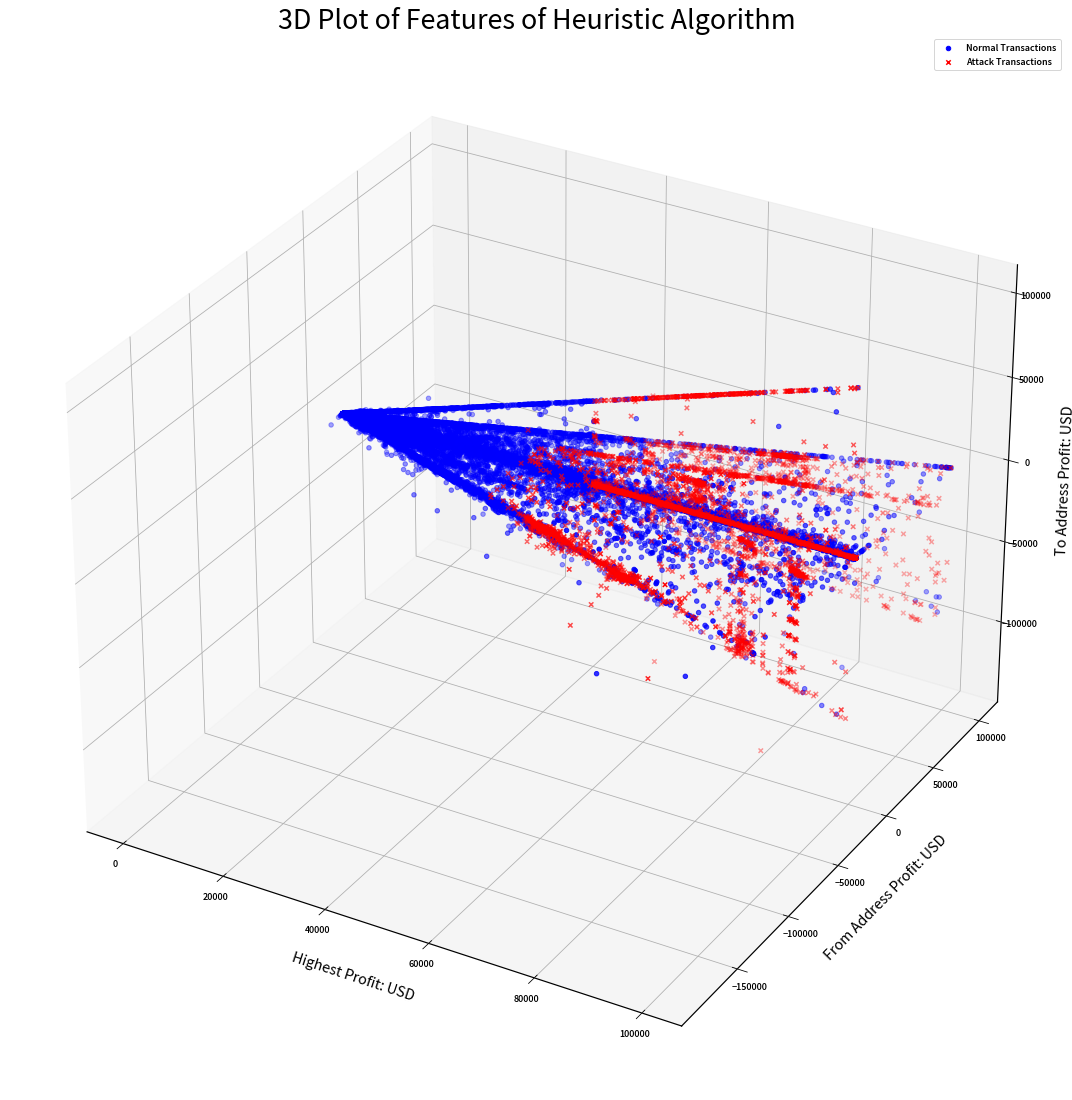

In [18]:
from mpl_toolkits.mplot3d import Axes3D

attack_label = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/attack_label.csv')
unlabeled = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/unlabeled.csv')

attack_label['flashloan_in_usd'] = pd.to_numeric(attack_label['flashloan_in_usd'], errors='coerce')
unlabeled['flashloan_in_usd'] = pd.to_numeric(unlabeled['flashloan_in_usd'], errors='coerce')

x = unlabeled['highest_profit_in_usd']
y = unlabeled['from_address_profit']
z = unlabeled['to_address_profit']


filtered_normal = x < 100000
x = x[filtered_normal]
y = y[filtered_normal]
z = z[filtered_normal]

x_attack = attack_label['highest_profit_in_usd']
y_attack = attack_label['from_address_profit']
z_attack = attack_label['to_address_profit']

filtered_attack = x_attack < 100000
x_attack = x_attack[filtered_attack]
y_attack = y_attack[filtered_attack]
z_attack = z_attack[filtered_attack]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c= 'blue', marker='o', label='Normal Transactions')
ax.scatter(x_attack, y_attack, z_attack, c='red', marker='x', label='Attack Transactions')

ax.set_xlabel('Highest Profit: USD', labelpad=15)
ax.set_ylabel('From Address Profit: USD', labelpad=15)
ax.set_zlabel('To Address Profit: USD', labelpad=15)

plt.tight_layout()
ax.set_title('3D Plot of Features of Heuristic Algorithm', fontsize=30)
ax.legend()

plt.savefig('/home/user/gzhao/Thesis/result/3d_plot_heuristic.pdf', facecolor='white', transparent=False)
plt.savefig('/home/user/gzhao/Thesis/result/3d_plot_heuristic.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

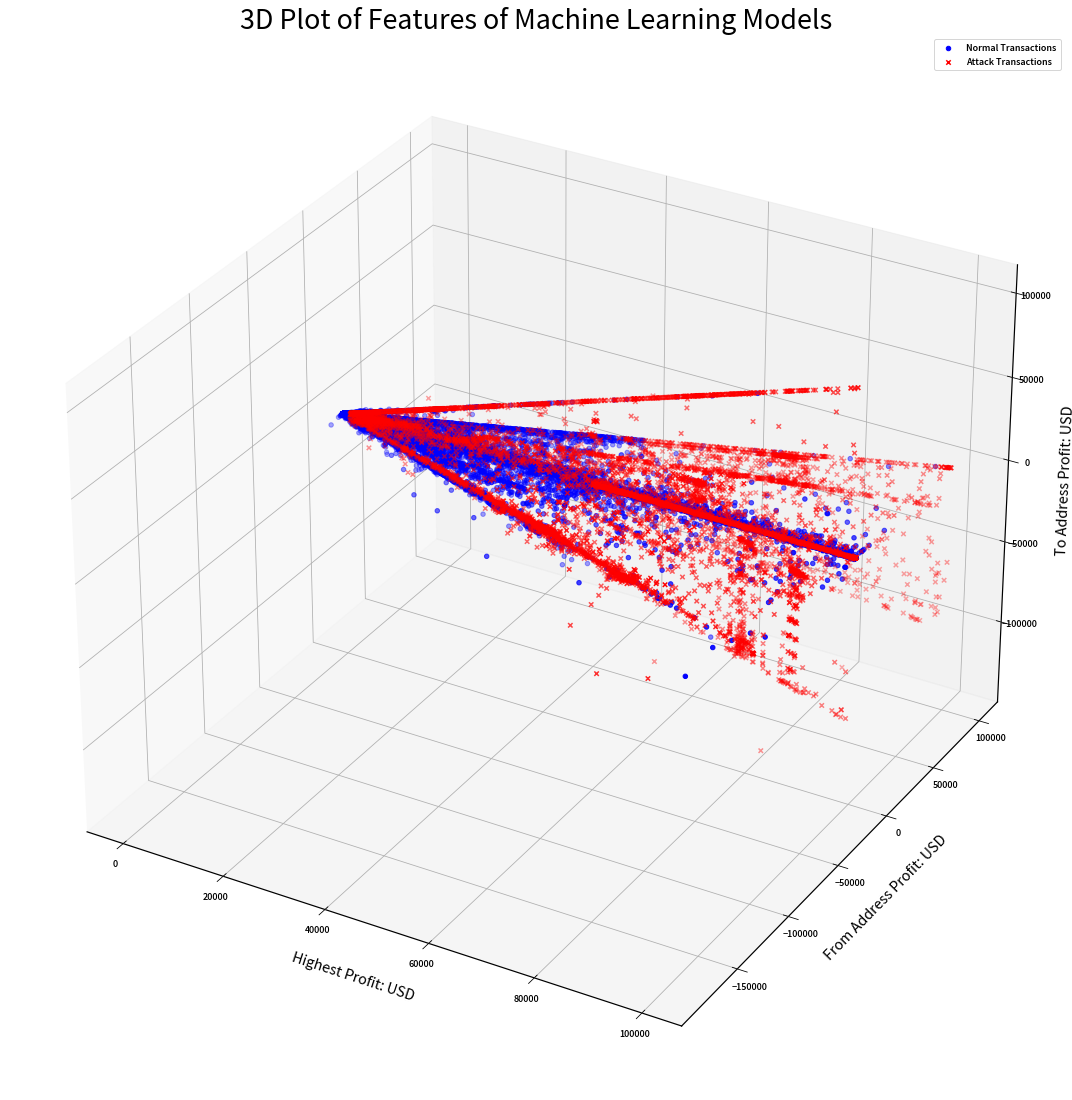

In [19]:
attack_label = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/attack_label.csv')
unlabeled = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/unlabeled.csv')
unlabeled_all_attack = pd.read_csv('/home/user/gzhao/Thesis/Models/unlabeled_all_attack_data.csv')

attack_label['flashloan_in_usd'] = pd.to_numeric(attack_label['flashloan_in_usd'], errors='coerce')
unlabeled['flashloan_in_usd'] = pd.to_numeric(unlabeled['flashloan_in_usd'], errors='coerce')
unlabeled_all_attack['flashloan_in_usd'] = pd.to_numeric(unlabeled_all_attack['flashloan_in_usd'], errors='coerce')

features = ['from_address_profit', 'to_address_profit', 'highest_profit_in_usd',
            'highest_price_change_ratio', 'path_length', 'num_swap_events', 'flashloan_in_usd']

unlabeled_normal = unlabeled[~unlabeled['tx_hash'].isin(unlabeled_all_attack['tx_hash'])]

features = ['from_address_profit', 'to_address_profit', 'highest_profit_in_usd',
            'highest_price_change_ratio', 'path_length', 'num_swap_events', 'flashloan_in_usd']

merged_attack = pd.concat([unlabeled_all_attack[features], attack_label[features]], axis=0)

x = unlabeled_normal['highest_profit_in_usd']
y = unlabeled_normal['from_address_profit']
z = unlabeled_normal['to_address_profit']

filtered_normal = x < 100000
x = x[filtered_normal]
y = y[filtered_normal]
z = z[filtered_normal]

x_attack = merged_attack['highest_profit_in_usd']
y_attack = merged_attack['from_address_profit']
z_attack = merged_attack['to_address_profit']

filtered_attack = x_attack < 100000
x_attack = x_attack[filtered_attack]
y_attack = y_attack[filtered_attack]
z_attack = z_attack[filtered_attack]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c= 'blue', marker='o', label='Normal Transactions')
ax.scatter(x_attack, y_attack, z_attack, c='red', marker='x', label='Attack Transactions')

ax.set_xlabel('Highest Profit: USD', labelpad=15)
ax.set_ylabel('From Address Profit: USD', labelpad=15)
ax.set_zlabel('To Address Profit: USD', labelpad=15)

plt.tight_layout()
ax.set_title('3D Plot of Features of Machine Learning Models', fontsize=30)
ax.legend()

plt.savefig('/home/user/gzhao/Thesis/result/3d_plot_models.pdf', facecolor='white', transparent=False)
plt.savefig('/home/user/gzhao/Thesis/result/3d_plot_models.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

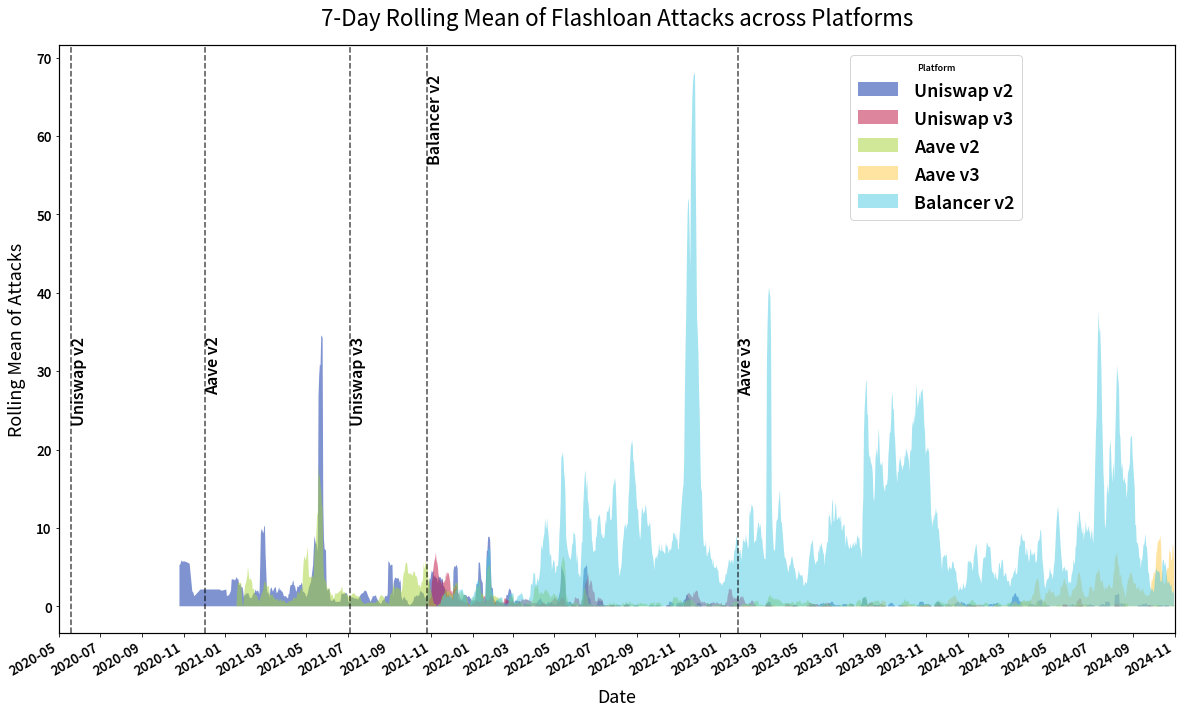

Uniswap v2:
  - Average daily attack count: 1.04
  - Highest daily attack count: 157.0
Uniswap v3:
  - Average daily attack count: 0.32
  - Highest daily attack count: 13.0
Aave v2:
  - Average daily attack count: 0.91
  - Highest daily attack count: 53.0
Aave v3:
  - Average daily attack count: 0.52
  - Highest daily attack count: 24.0
Balancer v2:
  - Average daily attack count: 7.81
  - Highest daily attack count: 146.0


In [20]:
first_transaction_dates = {
    'Uniswap v2': Uniswap_v2_flashloan_count_df['date'].iloc[0],
    'Uniswap v3': Uniswap_v3_flashloan_count_df['date'].iloc[0],
    'Aave v2': Aave_v2_flashloan_count_df['date'].iloc[0],
    'Aave v3': Aave_v3_flashloan_count_df['date'].iloc[0],
    'Balancer v2': Balancer_v2_flashloan_count_df['date'].iloc[0]
}

df = pd.read_csv('Models/unlabeled_all_attack_data.csv')
df['date'] = pd.to_datetime(df['date'])

filtered_df = df[df['All_Attack'] == True]


attacks_by_platform_date = filtered_df.groupby(['platform', 'date']).size().reset_index(name='attack_count')
pivoted_data = attacks_by_platform_date.pivot(index='date', columns='platform', values='attack_count').fillna(0)

# Reorder columns to match the specified platform order
platform_order = ['Uniswap v2', 'Uniswap v3', 'Aave v2', 'Aave v3', 'Balancer v2']
pivoted_data = pivoted_data[platform_order]

# Calculate rolling mean
rolling_window = 7
pivoted_data_rolling = pivoted_data.rolling(window=rolling_window).mean()

fig, ax = plt.subplots(figsize=(20, 12))

for platform in platform_order:
    ax.fill_between(pivoted_data_rolling.index, pivoted_data_rolling[platform], label=platform, alpha=0.5)

    first_transaction_date = first_transaction_dates[platform]
    ax.axvline(first_transaction_date, color='black', linestyle='--', alpha=0.7)
    
    ax.text(first_transaction_date, ax.get_ylim()[1] * 0.95, platform, 
            rotation=90, verticalalignment='top', fontsize=18, color='black')

ax.set_title('7-Day Rolling Mean of Flashloan Attacks across Platforms', fontsize=25, pad=20)
ax.set_xlabel('Date', fontsize=20, labelpad=10)
ax.set_ylabel('Rolling Mean of Attacks', fontsize=20, labelpad=10)
ax.tick_params(axis='x', rotation=45, labelsize=15)
ax.tick_params(axis='y', labelsize=15)

start_date = pd.to_datetime("2020-05-01")
end_date = pd.to_datetime("2024-11-01")
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
fig.autofmt_xdate()

ax.legend(loc='upper left', bbox_to_anchor=(0.7, 1), fontsize=20, ncol=1, frameon=True, title="Platform")
fig.savefig('/home/user/gzhao/Thesis/result/daily_flashloan_attacks_by_platforms.pdf', facecolor='white', transparent=False)
plt.show()

# Calculate average and maximum of rolling mean for each platform
for platform in platform_order:
    avg_attacks = pivoted_data[platform].mean()
    max_attacks = pivoted_data[platform].max()
    print(f"{platform}:")
    print(f"  - Average daily attack count: {avg_attacks:.2f}")
    print(f"  - Highest daily attack count: {max_attacks}")

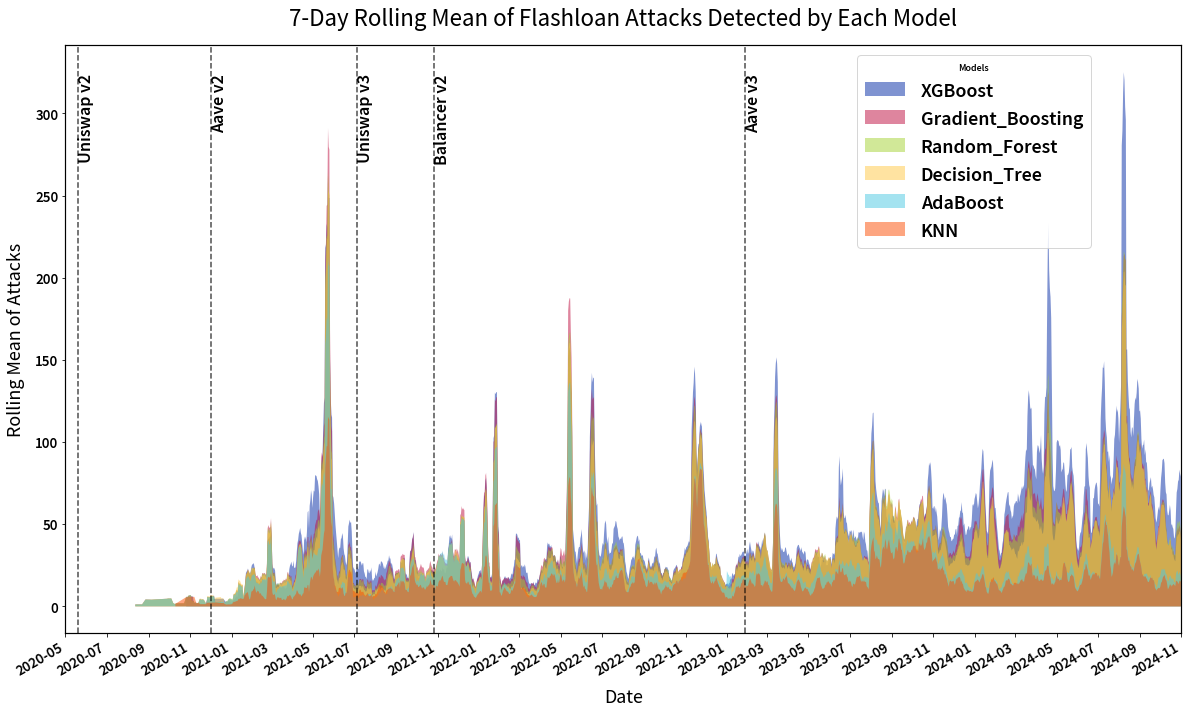

In [21]:
df = pd.read_csv('Models/unlabeled_all_models.csv')
df['date'] = pd.to_datetime(df['date'])
models = ['Random_Forest', 'KNN', 'Decision_Tree', 'Gradient_Boosting', 'AdaBoost', 'XGBoost']

rolling_window = 7  

# Calculate rolling means for all models and their total values
rolling_means = {}
for model in models:
    model_attacks_per_day = df[df[model] == 1].groupby('date').size()
    rolling_means[model] = model_attacks_per_day.rolling(window=rolling_window).mean()

# Sort models by the total rolling mean (sum) in descending order
models_sorted = sorted(models, key=lambda m: rolling_means[m].sum(), reverse=True)

fig, ax = plt.subplots(figsize=(20, 12))

# Plot models in sorted order
for model in models_sorted:
    rolling_mean = rolling_means[model]
    ax.fill_between(rolling_mean.index, rolling_mean, label=model, alpha=0.5)

for platform, first_date in first_transaction_dates.items():
    ax.axvline(first_date, color='black', linestyle='--', alpha=0.7)
    ax.text(first_date, ax.get_ylim()[1] * 0.95, platform, 
            rotation=90, verticalalignment='top', fontsize=18, color='black')

ax.set_title('7-Day Rolling Mean of Flashloan Attacks Detected by Each Model', fontsize=25, pad=20)
ax.set_xlabel('Date', fontsize=20, labelpad=10)
ax.set_ylabel('Rolling Mean of Attacks', fontsize=20, labelpad=10)
ax.tick_params(axis='x', rotation=45, labelsize=15)
ax.tick_params(axis='y', labelsize=15)

start_date = pd.to_datetime("2020-05-01")
end_date = pd.to_datetime("2024-11-01")
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
fig.autofmt_xdate()
ax.legend(loc='upper left', bbox_to_anchor=(0.7, 1), fontsize=20, ncol=1, frameon=True, title="Models")

fig.savefig('/home/user/gzhao/Thesis/result/daily_flashloan_attacks_by_models.pdf', facecolor='white', transparent=False)
plt.show()

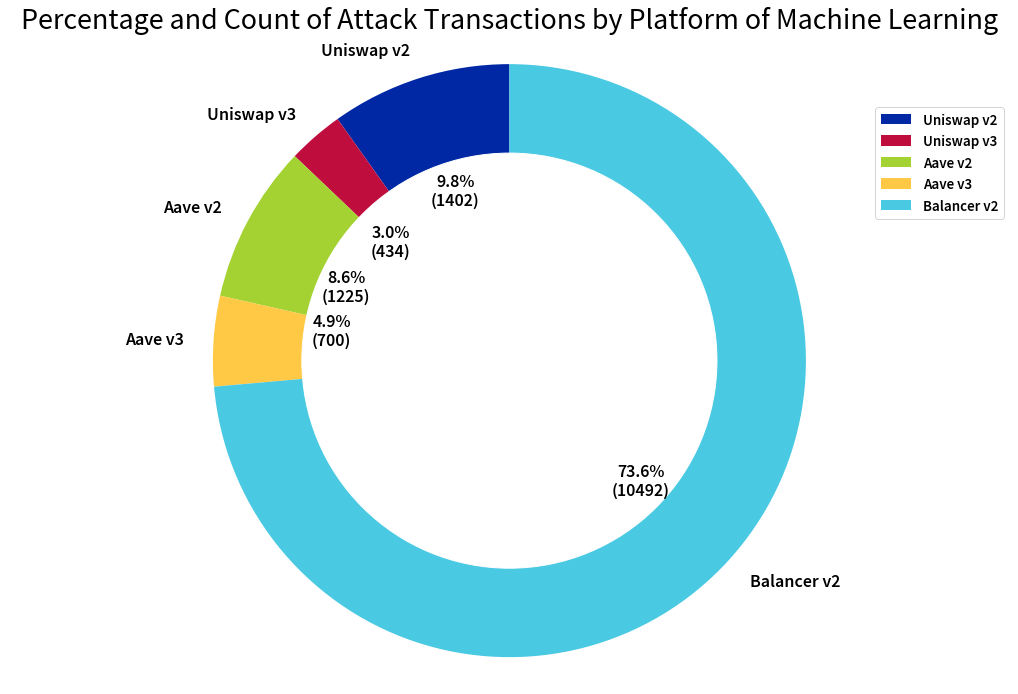

In [22]:
df = pd.read_csv('Models/unlabeled_all_attack_data.csv')
df['date'] = pd.to_datetime(df['date'])

filtered_df = df[df['All_Attack'] == True]

platform_counts = filtered_df['platform'].value_counts()
platform_counts = platform_counts.reindex(['Uniswap v2', 'Uniswap v3', 'Aave v2', 'Aave v3', 'Balancer v2'])

def autopct_format(pct, all_values):
    total = sum(all_values)
    absolute = int(pct / 100. * total)
    return "{:.1f}%\n({:d})".format(pct, absolute)


fig, ax = plt.subplots(figsize=(18, 12))

wedges, texts, autotexts = ax.pie(
    platform_counts,
    labels=platform_counts.index,
    autopct=lambda pct: autopct_format(pct, platform_counts),
    startangle=90,
    wedgeprops={'width': 0.4},
    textprops={'fontsize': 18},  
)


center_circle = plt.Circle((0, 0), 0.70, color='white')
ax.add_artist(center_circle)

for i, text in enumerate(autotexts):
    if platform_counts.index[i] == 'Aave v2':  
        text.set_position((-0.55, 0.25)) 
    if platform_counts.index[i] == 'Aave v3':  
        text.set_position((-0.6, 0.1))  
    if platform_counts.index[i] == 'Uniswap v3':  
        text.set_position((-0.4, 0.4)) 


ax.axis('equal')

ax.legend(
    loc='upper right',  
    fontsize=15,       
    bbox_to_anchor=(1, 0.9)  
)

ax.set_title('Percentage and Count of Attack Transactions by Platform of Machine Learning', fontsize=30)
fig.savefig('/home/user/gzhao/Thesis/result/Donut_chart_Attack_Transaction_Distribution_Machine_Learning.pdf', facecolor='white', transparent=False)
plt.show()

In [23]:
unlabeled = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/unlabeled.csv')
attack_tx_df = pd.read_csv('Models/unlabeled_all_attack_data.csv')
attack_tx_hashes = set(attack_tx_df['tx_hash'])

df = unlabeled[unlabeled['tx_hash'].isin(attack_tx_hashes)]
df

,tx_hash,date,block_number,transactionIndex,logIndex,from_address,to_address,account_balance_change,ABC_in_usd,price_list,...,highest_profit_in_usd,reserve_before_swap_list,reserve_after_swap_list,price_change_ratio_list,highest_price_change_ratio,path_length,num_swap_events,flashloan_in_usd,platform,Unnamed: 0
178,0x0016745693d68d734faa408b94cdf2d6c95f511b50f4...,2021-08-30,13124591,38,99,0xce1f4b4f17224ec6df16eeb1e3e5321c54ff6ede,0xbd51cb8c06f768d3225b613b79b1386f4c83d1fa,address ...,address ...,[{'token_address': '0xd06527d5e56a3495252a528c...,...,1.187568e+05,[{'reserve0': Decimal('976510762317055905363')...,[{'reserve0': Decimal('947200762317055905363')...,[Decimal('-0.059214126372562098741003227429558...,0.059214,27,2,0.000000e+00,Uniswap v2,NaN
446,0x003849a66480ceb4ed2763d07014f6a4334335e50cd1...,2021-02-09,11819175,208,246,0x779110332344f3f6bc1027a74a410102defdd50f,0x887c868638052ded86bb07fe53da745692621995,address ...,address ...,[{'token_address': '0x798d1be841a82a273720ce31...,...,1.212236e+04,"[{'reserve0': Decimal('NaN'), 'reserve1': Deci...","[{'reserve0': Decimal('NaN'), 'reserve1': Deci...","[Decimal('NaN'), Decimal('0.029564430561226543...",0.029564,9,2,0.000000e+00,Uniswap v2,NaN
486,0x003db55ff9a4dcf7382b428b56627d8b587b6e1b7ffb...,2021-05-19,12464925,37,113,0x2cc72a4b0a91ea60fb7b47a7e48f6155a4ec64e6,0xb7990f251451a89728eb2aa7b0a529f51d127478,address ...,address ...,[{'token_address': '0x6b175474e89094c44da98b95...,...,6.256279e+04,"[{'reserve0': Decimal('NaN'), 'reserve1': Deci...","[{'reserve0': Decimal('NaN'), 'reserve1': Deci...","[Decimal('NaN'), Decimal('-0.00209982322848042...",0.002100,21,2,6.256279e+04,Uniswap v2,NaN
687,0x00562c47cac39a30c242d9d515ba128faa91e602478f...,2021-08-10,12997601,216,264,0x0000000036deb131f6dcd641e4323a8df22268dd,0x0000000000005117dd3a72e64a705198753fdd54,address ...,address ...,[{'token_address': '0x1f573d6fb3f13d689ff844b4...,...,5.131330e+03,[{'reserve0': Decimal('151339617772550531276')...,[{'reserve0': Decimal('149874800918270645979')...,[Decimal('-0.019292888533179305358559918721019...,0.031713,20,2,4.310711e+03,Uniswap v2,NaN
1674,0x00d1354c12f62326f444f896bd8f3993462335f05cdd...,2022-01-21,14051434,54,184,0x18b7215edbfc06f24d9e505e0631ca2a4eb909fd,0xb2b3d5b6215d4fb23bf8dd642d385c4b44aadb2a,address ...,address ...,[{'token_address': '0xa0b86991c6218b36c1d19d4a...,...,3.089699e+05,"[{'reserve0': Decimal('98731850830251'), 'rese...","[{'reserve0': Decimal('98423362514396'), 'rese...",[Decimal('-0.006248593561209552339373515768180...,0.006249,24,1,3.078417e+05,Uniswap v2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753865,0xfff265a5b81f642c7d429c262b7303709f1c4f65a9ff...,2023-02-18,16655514,0,56,0xf480fab87c07ec2ddd68a83ec0319bb466b1afa2,0x795fd0c1fa746b83ee568544a6f3e67c091c8954,address...,address...,[{'token_address': '0xdac17f958d2ee523a2206206...,...,2.953724e+06,"[{'reserve0': Decimal('555674637283195029'), '...","[{'reserve0': Decimal('650532082115321756'), '...",[Decimal('-0.000020214685693333448921217580020...,0.000020,57,1,9.013377e+06,Balancer v2,162078.0
753867,0xfff401ae3e5bfd847f34e02c551c9801bd7914258bae...,2023-06-04,17407608,10,41,0x75444282050682a43d1220cc4a09362c032538a3,0xbf901f52aef5bb098f6f7918e1fa0c639720f409,address ...,address ...,[{'token_address': '0xa0b86991c6218b36c1d19d4a...,...,3.570796e+04,"[{'reserve0': Decimal('1945844520534520'), 're...","[{'reserve0': Decimal('1945809198454110'), 're...",[Decimal('0.0000363061301561992103670917207574...,0.000036,19,1,5.026621e+05,Balancer v2,162080.0
753869,0xfff50f703c0b20211a4fb5c28c0bdf5d5bbf72e89570...,2022-11-10,15942458,4,65,0xf480fab87c07ec2ddd68a83ec0319bb466b1afa2,0x9705b569ce3d1ddbe421c7b3b4e495445b096160,address...,address...,[{'token_address': '0x030ba81f1c18d280636f32af...,...,9.462355e+05,"[{'reserve0': Decimal('1142287509479328'), 're...","[{'reserve0': Decimal('52091304187258872'), 'r...",[Decimal('-0.000773212080630793590317261532755...,

In [24]:
features = ['from_address_profit', 'to_address_profit', 'highest_profit_in_usd',
            'highest_price_change_ratio', 'path_length', 'num_swap_events', 'flashloan_in_usd']

df['flashloan_in_usd'] = pd.to_numeric(df['flashloan_in_usd'], errors='coerce')

stats = df[features].agg(['mean', 'median', 'std']).T
print(stats)

                                    mean         median           std
from_address_profit        -2.610802e+02     -58.833935  1.040591e+06
to_address_profit           9.283021e+03       0.000000  5.866554e+05
highest_profit_in_usd       1.838037e+06  519835.549910  2.768654e+07
highest_price_change_ratio  4.063486e+34       0.000184  3.924350e+36
path_length                 3.691339e+01      36.000000  3.576213e+01
num_swap_events             9.646539e-01       1.000000  2.423702e+00
flashloan_in_usd            7.339178e+06  813035.968203  2.858877e+07


/tmp/ipykernel_1458876/4110231177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flashloan_in_usd'] = pd.to_numeric(df['flashloan_in_usd'], errors='coerce')
